<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

# Macroeconomia e Finanças

In [1]:
chave = '5Dvc13kQ_qEj-QnxsJdA'

Instalando Biblioteca

In [2]:
def extracao_bcb(codigo, data_inicio, data_fim):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
  df = pd.read_json(url)
  df.set_index('data', inplace= True)
  df.index = pd.to_datetime(df.index, dayfirst=True)
  df.rename(columns={'valor':'Value'},inplace=True)
  return df

In [3]:
#Importando bibliotecas

import nasdaqdatalink
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
nasdaqdatalink.ApiConfig.api_key = chave

Indicadores Macros

In [5]:
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR')

In [6]:
juros_reais_EUA

,Value
Date,
2000-07-03,7.03
2000-07-05,6.52
2000-07-06,6.51
2000-07-07,6.42
2000-07-10,6.51
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [7]:
type(juros_reais_EUA)

pandas.core.frame.DataFrame

In [8]:
#limitar a data
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR', start_date='2022-01-01', end_date='2023-12-31')
juros_reais_EUA

,Value
Date,
2022-01-03,0.08
2022-01-04,0.08
2022-01-05,0.08
2022-01-06,0.08
2022-01-07,0.08
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [9]:
juros_reais_EUA.tail()

,Value
Date,
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58
2022-07-14,1.58
2022-07-15,1.58


# TAXA SELIC

In [33]:
#selic = nasdaqdatalink.get('BCB/432', start_date='2000-01-01', end_date='2022-12-31')
selic = extracao_bcb(432,'01/01/2020', '31/12/2024')
selic

,Value
data,
2020-01-01,4.50
2020-01-02,4.50
2020-01-03,4.50
2020-01-04,4.50
2020-01-05,4.50
...,...
2024-01-27,11.75
2024-01-28,11.75
2024-01-29,11.75


In [34]:
selic.tail()

,Value
data,
2024-01-27,11.75
2024-01-28,11.75
2024-01-29,11.75
2024-01-30,11.75
2024-01-31,11.75


In [35]:
#Criar um gráfico da Selic

fig = go.Figure()
fig.add_trace(go.Scatter(name='SELIC', x=selic.index,y=selic.Value))
fig.show()

# Indicadores de Inflação

IPCA

In [13]:
#ipca = nasdaqdatalink.get('BCB/13522',start_date='2000-01-01')
ipca = extracao_bcb(13522, '01/01/2023', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
ipca

,Value
data,
2023-01-01,5.77
2023-02-01,5.60
2023-03-01,4.65
2023-04-01,4.18
2023-05-01,3.94
2023-06-01,3.16
2023-07-01,3.99
2023-08-01,4.61
2023-09-01,5.19


In [14]:
ipca.tail()

,Value
data,
2023-08-01,4.61
2023-09-01,5.19
2023-10-01,4.82
2023-11-01,4.68
2023-12-01,4.62


Criando o gráfico

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(name = 'IPCA', x=ipca.index, y=ipca.Value))
fig.update_layout(title_text='<b>IPCA Acumulado 12M', template='simple_white')
fig.show()

In [16]:
#ipca_adm = nasdaqdatalink.get('BCB/4449', start_date = '2000-01-01')
ipca_adm = extracao_bcb(4449, '01/01/2023', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig = go.Figure()
fig.add_trace(go.Bar(name='IPCA_ADM', x=ipca_adm.index, y=ipca_adm.Value))
fig.show()

IGPM

In [17]:
#IGPM

#igpm = nasdaqdatalink.get('BCB/189', start_date='2000-01-01')


igpm = extracao_bcb(189, '01/01/2023', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
igpm

,Value
data,
2023-01-01,0.21
2023-02-01,-0.06
2023-03-01,0.05
2023-04-01,-0.95
2023-05-01,-1.84
2023-06-01,-1.93
2023-07-01,-0.72
2023-08-01,-0.14
2023-09-01,0.37


In [28]:
igpm.tail()

,Value
data,
2023-08-01,-0.14
2023-09-01,0.37
2023-10-01,0.50
2023-11-01,0.59
2023-12-01,0.74


In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='IGPM', x=igpm.index, y=igpm.Value))
fig.show()

# PIB


In [19]:
#PIB em dólar ODA/BRA_NGDPD

#pib = nasdaqdatalink.get('BCB/4380', start_date='2000-01-01')

pib = extracao_bcb(4380, '01/01/2000', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))
fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB', x=pib.index, y=pib.Value))
fig.show()


# Dólar


In [20]:
#Yahoo Finance BRL=X
#Nasdaq Datalink Banco Central BCB/10813

#dolar = nasdaqdatalink.get('BCB/10813', start_date='2000-01-01')

dolar = extracao_bcb(10813, '01/01/2023', data_fim=pd.to_datetime(datetime.today().date()).strftime('%d/%m/%Y'))

fig = go.Figure()
fig.add_trace(go.Scatter(name='DÓLAR', x=dolar.index, y=dolar.Value))
fig.update_layout(title_text='Dólar/Real', template='simple_white')
fig.show()

# Indicadores Macro

In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns



In [22]:
selic2 = pd.DataFrame()
confianca_consumidor2 = pd.DataFrame()
pib2 = pd.DataFrame()
incc2 = pd.DataFrame()
ipca2 = pd.DataFrame()
dolar2 = pd.DataFrame()

In [23]:
inicio = '01/01/2020'
fim = '31/12/2024'
selic2['SELIC'] = extracao_bcb(432, inicio, data_fim=fim)
selic2 = selic2.resample('M').last()
confianca_consumidor2['CONFIANCA'] = extracao_bcb(4393, inicio, data_fim=fim)
confianca_consumidor2 = confianca_consumidor2.resample('M').last()
pib2['PIB'] = extracao_bcb(4380, inicio, data_fim=fim)
pib2 = pib2.resample('M').last()
ipca2['IPCA'] = extracao_bcb(13522, inicio, data_fim=fim)
ipca2 = ipca2.resample('M').last()
incc2['INCC'] =extracao_bcb(192, inicio, data_fim=fim)
incc2 = incc2.resample('M').last()
dolar2['DOLAR'] = extracao_bcb(10813, inicio, data_fim=fim)
dolar2 = dolar2.resample('M').last()

In [24]:
macros = pd.concat([selic2, confianca_consumidor2, pib2, ipca2, incc2, dolar2], axis=1)
macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
data,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,4.0301
2020-01-31,4.50,121.27,613922.5,4.19,0.38,4.2689
2020-02-29,4.25,131.79,618277.1,4.01,0.33,4.4981
2020-03-31,3.75,124.58,635894.9,3.30,0.26,5.1981
2020-04-30,3.75,111.97,567582.9,2.40,0.22,5.4264
2020-05-31,3.00,96.82,577724.0,1.88,0.20,5.4257
2020-06-30,2.25,100.43,607416.6,2.13,0.34,5.4754
2020-07-31,2.25,102.84,643956.6,2.31,1.17,5.2027
2020-08-31,2.00,102.62,637395.2,2.44,0.72,5.4707


In [25]:
#Criando uma matriz de correlação

corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
SELIC,1.000000,0.419084,0.881217,0.294377,-0.375938,-0.405438
CONFIANCA,0.419084,1.000000,0.468320,-0.349598,-0.469298,-0.432491
PIB,0.881217,0.468320,1.000000,0.306915,-0.225900,-0.281544
IPCA,0.294377,-0.349598,0.306915,1.000000,0.309301,0.006561
INCC,-0.375938,-0.469298,-0.225900,0.309301,1.000000,0.173224
DOLAR,-0.405438,-0.432491,-0.281544,0.006561,0.173224,1.000000


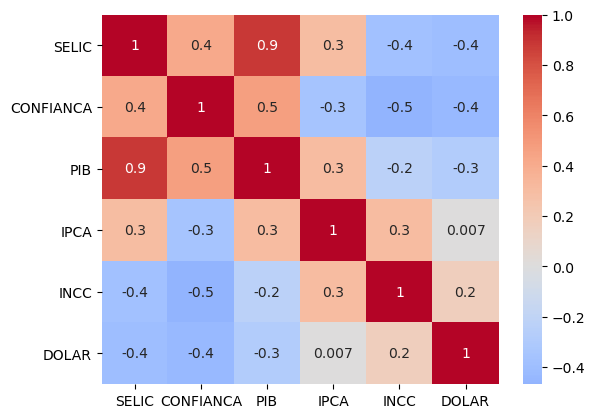

In [26]:
#Construir um heatmap

lista_macros = macros.columns

sns.heatmap(corr_macros, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [27]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=macros.index, y=macros['SELIC']),row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, y=macros['IPCA']),row=1, col=1, secondary_y=False)
fig.update_layout(title_text='SELIC VS IPCA', template='simple_white')
fig.show()

#  Extraindo dados diretamento da API do Banco Central

# <img src='https://files.sunoresearch.com.br/p/uploads/2018/01/bacen.jpg.jpg' width='300' align='left'/>



Extração de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=01/01/2023&dataFinal=12/01/2024'

In [ ]:
df = pd.read_json(url)

In [ ]:
#Data para index
df.set_index('data', inplace = True)

In [ ]:
#Verificar o 5 primeiros.
df.head()

In [ ]:
#Verificar os 5 últimos
df.tail()

In [ ]:
df.index = pd.to_datetime(df.index, dayfirst= True)

In [ ]:
df.plot();

# 2. Generalização da extração

In [ ]:
def extracao_bcb(codigo, data_inicio, data_fim):
    url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json&dataInicial={}&dataFinal={}'.format(codigo, data_inicio, data_fim)
    df = pd.read_json(url)
    df.set_index('data', inplace= True)
    df.index = pd.to_datetime(df.index, dayfirst = True)
    return df

In [ ]:
extracao_bcb(433, '01/01/2023', '12/01/2024').plot();